In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
ruta = 'C:/Users/pepe2/Documents/QuackRepository/Quack/Ciencia_de_Redes/road-euroroad.edges'

datos = pd.read_csv(ruta,
            # usecols=[0,1],
            skiprows=2,
            header=None,
            sep=' ',
            )
datos

,0,1
0,1,2
1,2,3
2,2,17
3,3,4
4,4,5
...,...,...
1412,1167,1168
1413,1168,1169
1414,1169,1170
1415,1171,1172


In [4]:
G = nx.from_pandas_edgelist(datos, source = 0, target = 1)

In [5]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)

p = k / (N-1)
print('Propiedades generales de tu red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)
print('\nEl coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:\n', p)

Propiedades generales de tu red:
- El número de nodos es:	 1174
- El número de enlaces es:	 1417
- El grado promedio es:		 2.41396933560477


El coeficiente de clustering promedio de la red es:
 0.016731564857629593

El coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:
 0.002057944872638338


### Pregunta 1

**¿Consideras que el modelo de red aleatoria se ajusta a la red real que estás utilizando?**

*Yo creo que NO se acerca mucho a lo que realmente nuestra red real esta representando porque el grado de clustering promedio de nuestra red es de 0.0157315 el cálculo del clustering como si fuese aleatoria la red es de 0.0020579*


## 2.1.3.2. DIstribución de grado

In [6]:
# se generan los diccionarios
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

In [7]:
# se genera el dataframe (la tabla)
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']
df

,Degree,Clustering
1,1.0,0.0
2,3.0,0.0
3,2.0,0.0
17,3.0,0.0
4,3.0,0.0
...,...,...
1168,2.0,0.0
1169,2.0,0.0
1172,1.0,0.0
1173,1.0,0.0


In [8]:
df.Degree.values

array([1., 3., 2., ..., 1., 1., 1.])

In [9]:
K = df.Degree.max()
K

10.0

In [10]:
y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density= True)

In [11]:
from scipy.stats import poisson

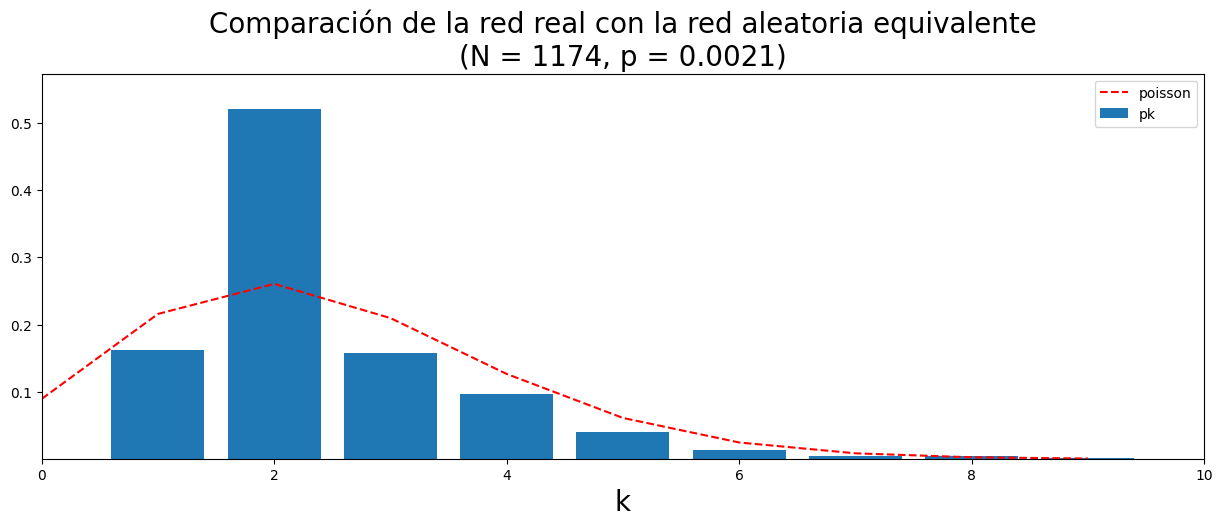

In [12]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,x.max()])
plt.xlabel('k', size = 20)
plt.legend()
plt.show()

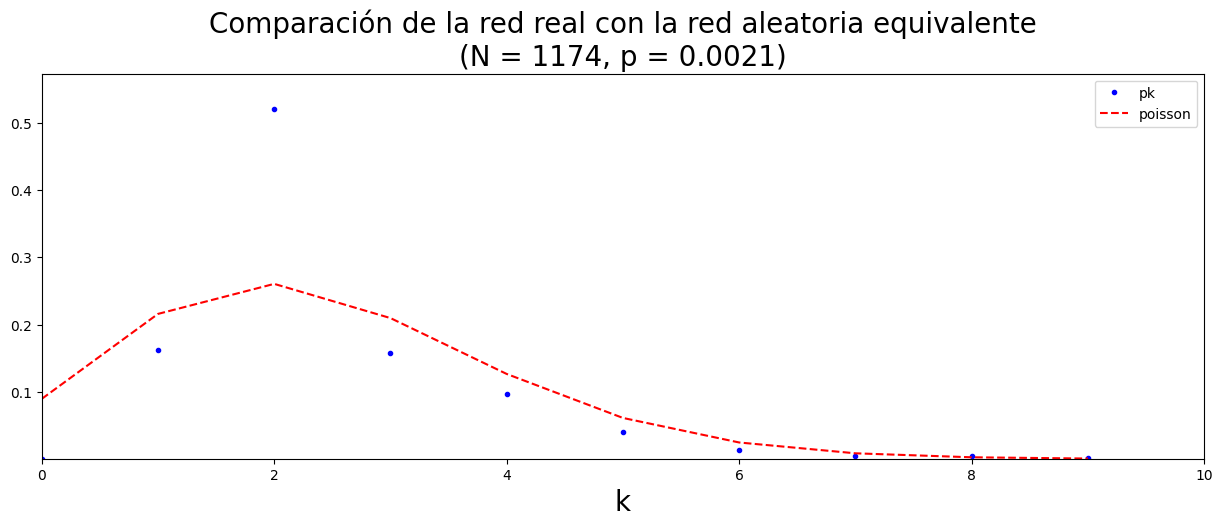

In [35]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y,"b." ,label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,x.max()])
plt.xlabel('k', size = 20)
plt.legend()
plt.show()

### Pregunta 2

**¿Consideras que la distribución de grado de la red aleatoria correspondiente se ajusta a la distribución de grado de la red real que estás analizando?**

*En esta red escogida sí se puede apreciar como a pesar de la poca variedad, la manera en la que se distribuye poisson muestra enorme similitud con el grado real de nuestra red.*



## Código para redes MUY grandes

No se puede apreciar debido a que la red escogida es muy pequeña

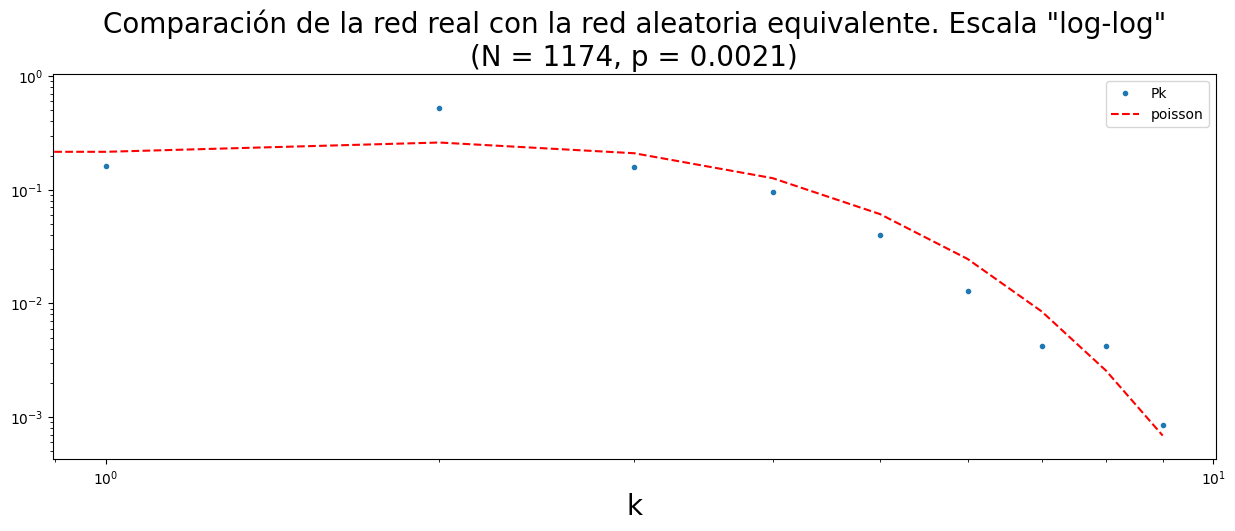

In [36]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = 'Pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])
plt.legend()

plt.title('Comparación de la red real con la red aleatoria equivalente. Escala "log-log"\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

plt.show()

## 2.1.3.3. Clustering de los nodos

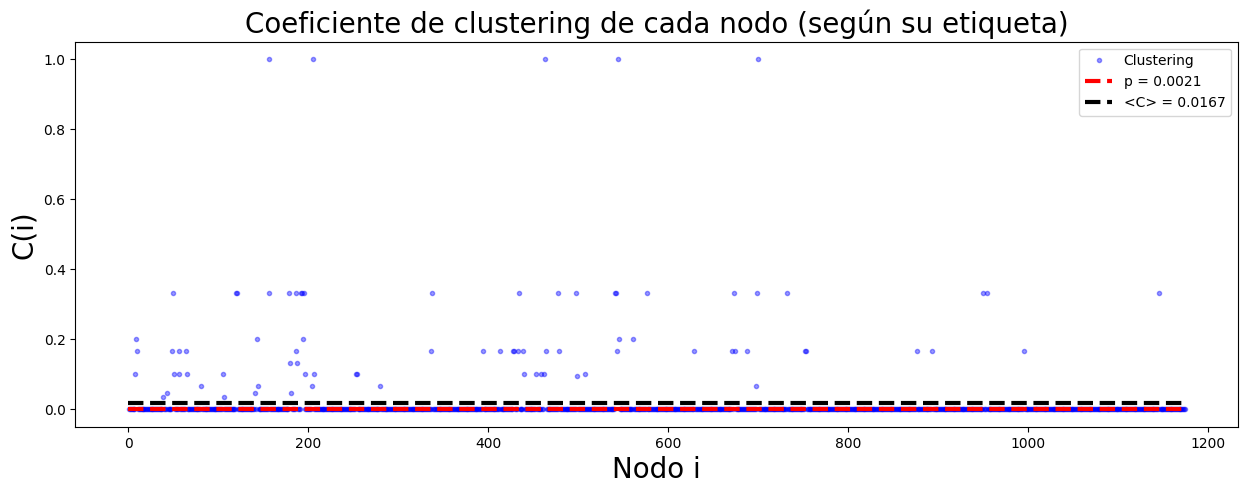

In [16]:
plt.figure(figsize = [15,5])
df.Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('Nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.title('Coeficiente de clustering de cada nodo (según su etiqueta)', size = 20)
plt.legend()

plt.show()

### Pregunta 3 

**¿El coeficiente de clustering que el modelo predice para cada nodo, se ajusta al coeficiente de clustering de los nodos de tu red?**

*Juzgando por lo que se ve en la gráfica, yo considero que sí se ajusta pero hay todavía una diferencia sin embargo considerando que es una aproximación, podría pasar como buena*

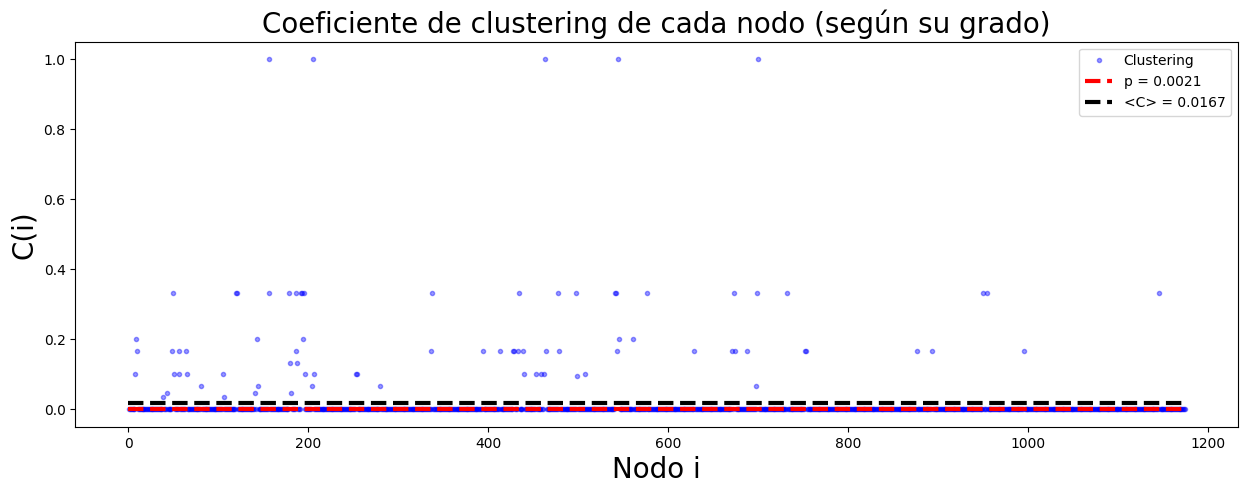

In [17]:
plt.figure(figsize = [15,5])
df.Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('Nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.title('Coeficiente de clustering de cada nodo (según su grado)', size = 20)
plt.legend()
plt.show()

### Pregunta 4

**¿Detectas alguna correlación o patrón interesante entre el grado y el clustering de los nodos?**

*Sí hay una correlación entre el grado y el clustering puesto que tanto el grado como el clustering tienen la misma línea de tendencia, podría decirse que hasta tienen la misma gráfica*

Finalmente, bajo la misma lógica que la anterior, se representan el clustering promedio de los nodos, agrupados según su grado. Esto limpia un poco el ruido de la representación anterior y revelaría de forma más clara si hubiera alguna correlación entre las magnitudes del grado y el clustering de los nodos. Se utiliza otra función muy poderosa de pandas llamada groupby. Sin entrar en la complejidad de esta función, se explica cada parte del código a continuación por si quieren usarlo en problemas similares:

se agrupan los elementos de la tabla df (i.e. los nodos) según el valor del grado: .groupby('Degree')

de la tabla agrupada, se considera sólo la columna “Clustering”: ['Clustering']

de la propiedad “Clustering” de los datos ya agrupados, se calcula el promedio: .mean()

ahora se forman los arreglos correspondientes al grado y al promedio del clustering aplicando tres funciones seguidas: .reset_index().values.T

estos arreglos se guardan como X y Y, respectivamente, para graficarlos

In [18]:
X, Y = df.groupby('Degree')['Clustering'].mean().reset_index().values.T

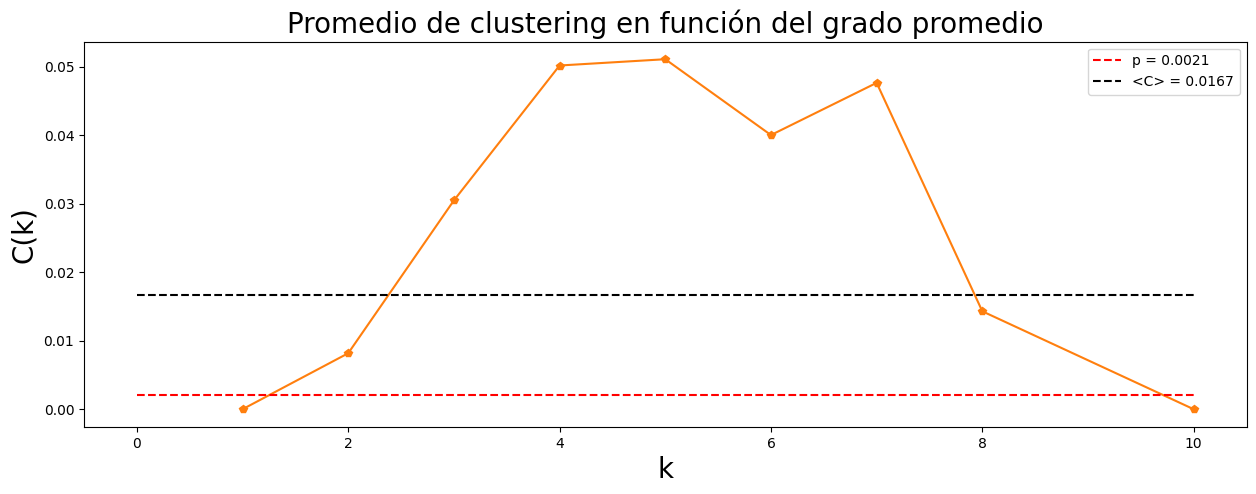

In [33]:
plt.figure(figsize=[15,5])
plt.plot(X, Y, '.')
plt.plot(X, Y, 'p-')

plt.plot([0,K], [p,p], 'r--', label = 'p = %.4f' %p)
plt.plot([0,K], [C,C], 'k--', label = '<C> = %.4f' %C)

plt.xlabel('k', size = 20)
plt.ylabel('C(k)', size = 20)
plt.title("Promedio de clustering en función del grado promedio", size = 20)
plt.legend()
plt.show()

### Pregunta 5
**En esta representación, ¿encuentras alguna correlación o patrón interesante entre los valores de y ?**

*Impresionantemente no veo ningún patrón entre el clustering y el grado promedio de nuestros nodos; sin embargo lo que sí veo es una pequeña campana de Gauss que se forma alrededor del 4-5.*